In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#EDA

Let's load the .csv file and take a look at the data!

In [2]:
#reading the csv file
data = pd.read_csv("bank-additional-full.csv", sep=";")

#the data separated with ; so to load it correctly we use sep=";"

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
print("!!!! job !!!!")
print(data["job"].value_counts())
print("!!!! martial status !!!!")
print(data["marital"].value_counts())
print("!!!! education !!!!")
print(data["education"].value_counts())

!!!! job !!!!
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
!!!! martial status !!!!
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
!!!! education !!!!
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Now, let's see how much people take deposit overall...

In [7]:
print("the client subscribed a term deposit?")
print(data["y"].value_counts())

the client subscribed a term deposit?
no     36548
yes     4640
Name: y, dtype: int64


In comparison, we can see that much more people do not take deposits!

Text(0.5, 1.0, 'y distribution')

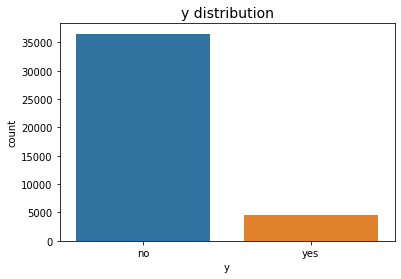

In [8]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

x='y'
features = [c for c in data.columns if c not in [x]]
sns.countplot(data[x])
plt.title("y distribution", fontsize=14)

Indeed, the 'no' category is bigger by almost 4-5 times!

Now, let's take a look how features correlate with deposit status (yes/no)...

In [9]:

#Let's perform univariate analysis of categorical variables.
#But first, segregating categorical & numerical variables

categories = ['job','marital','education','default','housing','loan','contact','month','day_of_week', 'poutcome']
numericals = [c for c in features if c not in categories]
numericals

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

Side by side barchart features/deposit status 

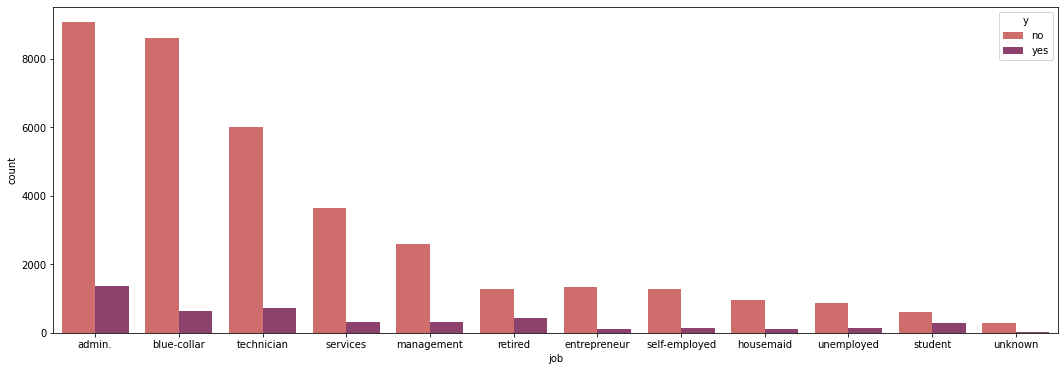

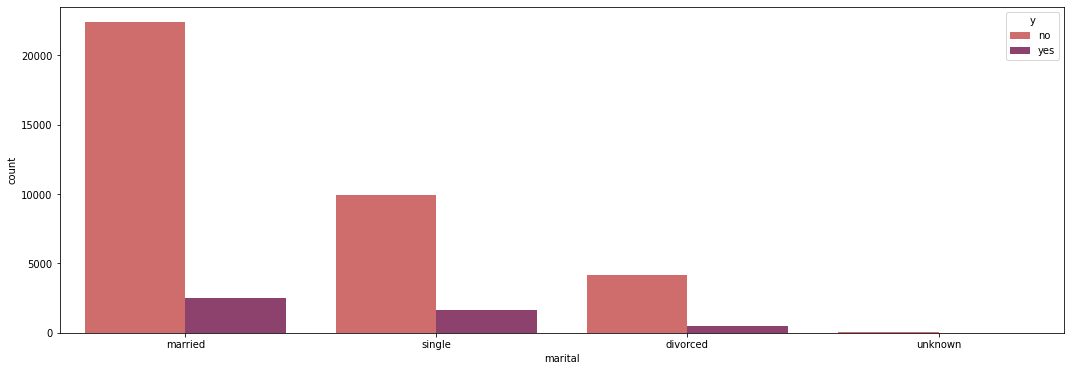

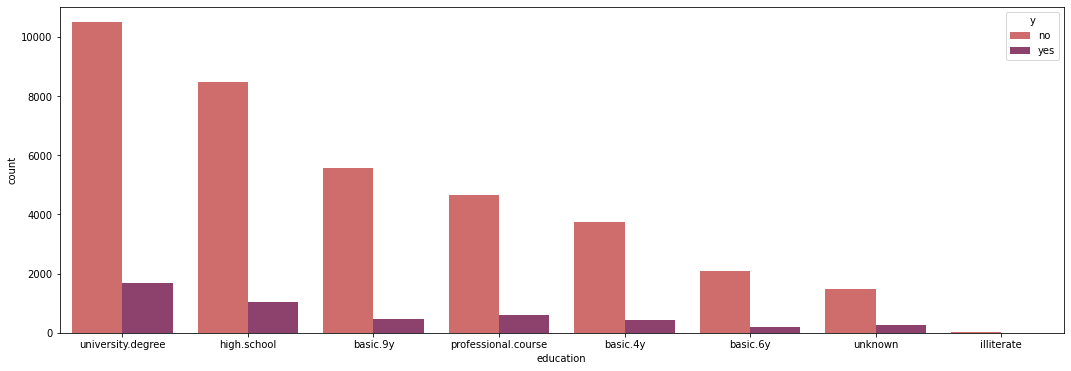

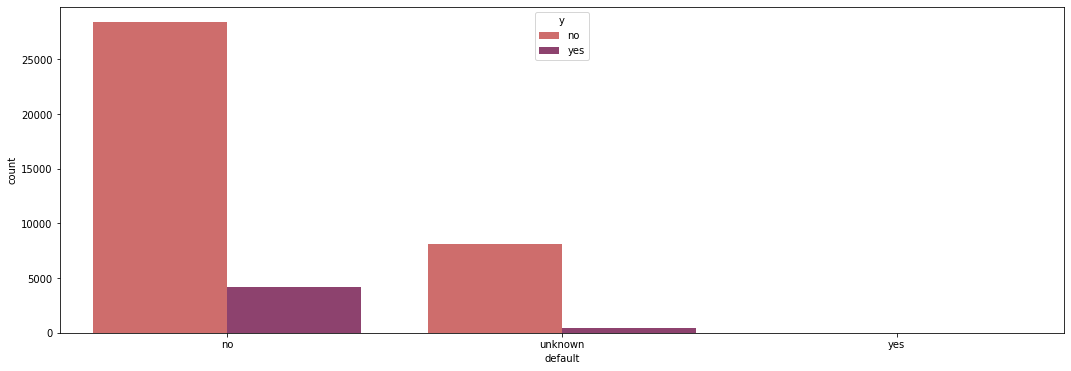

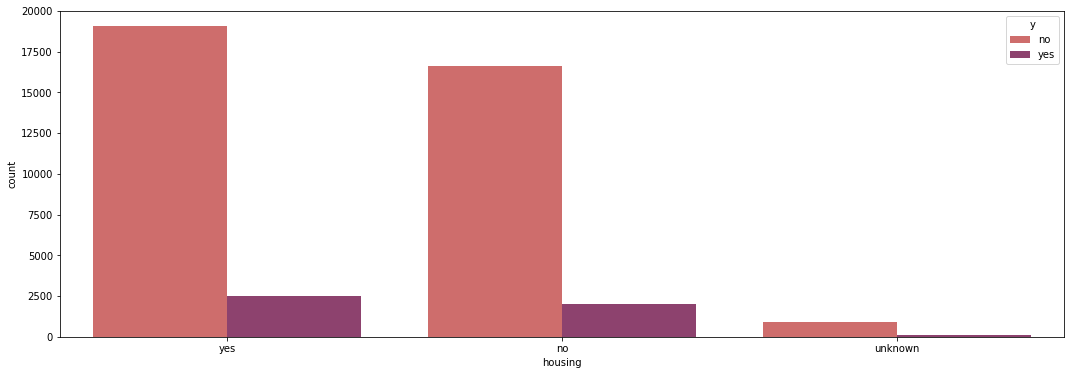

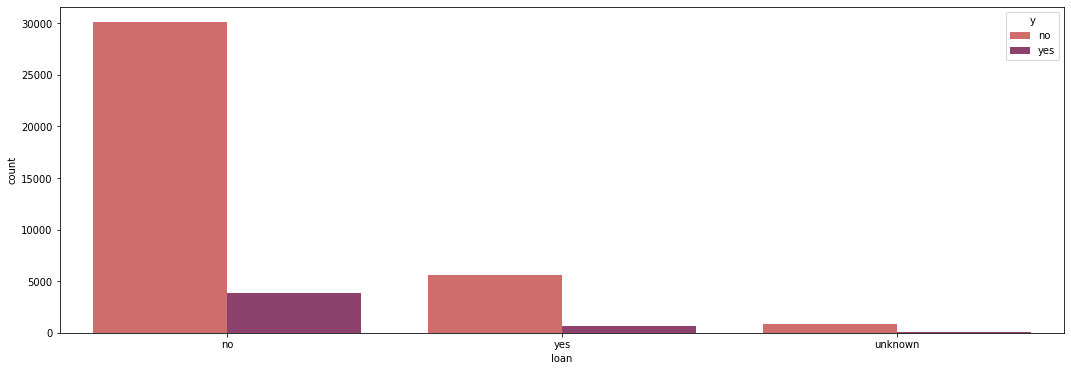

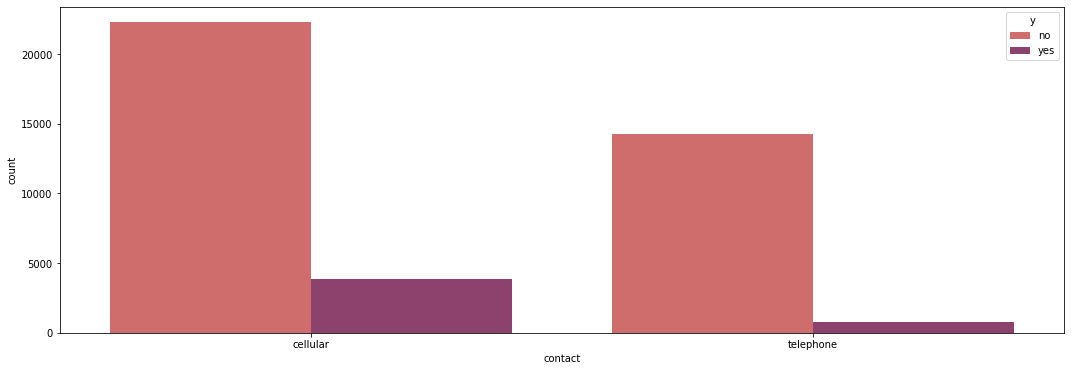

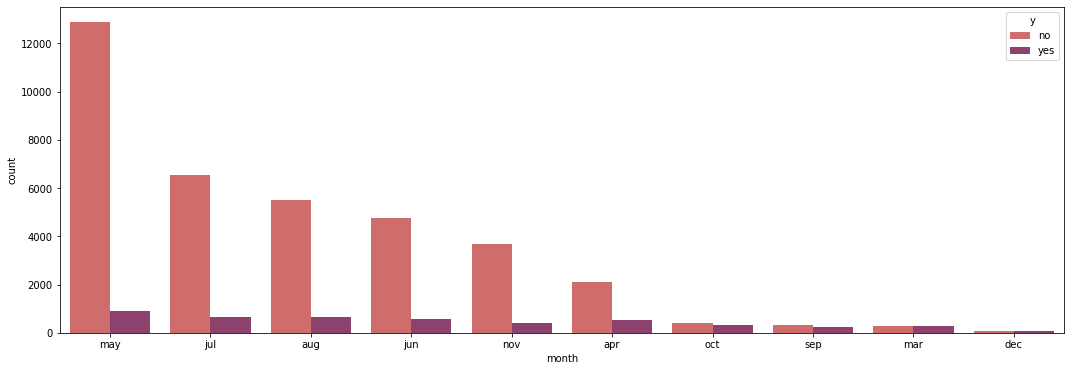

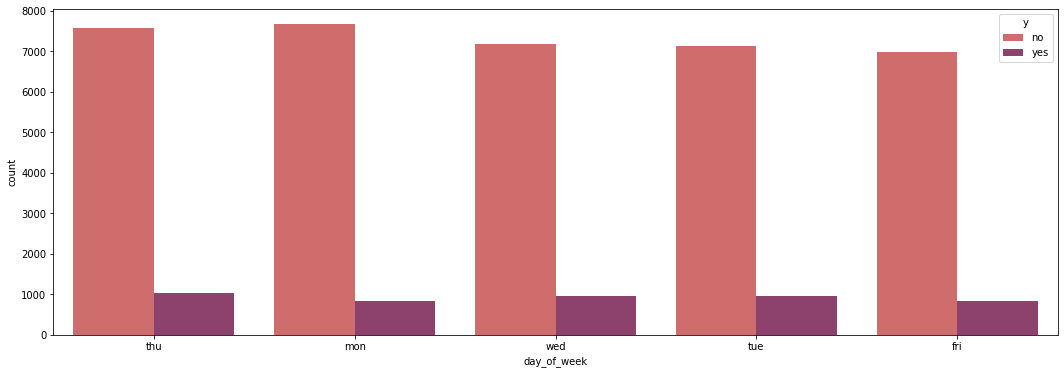

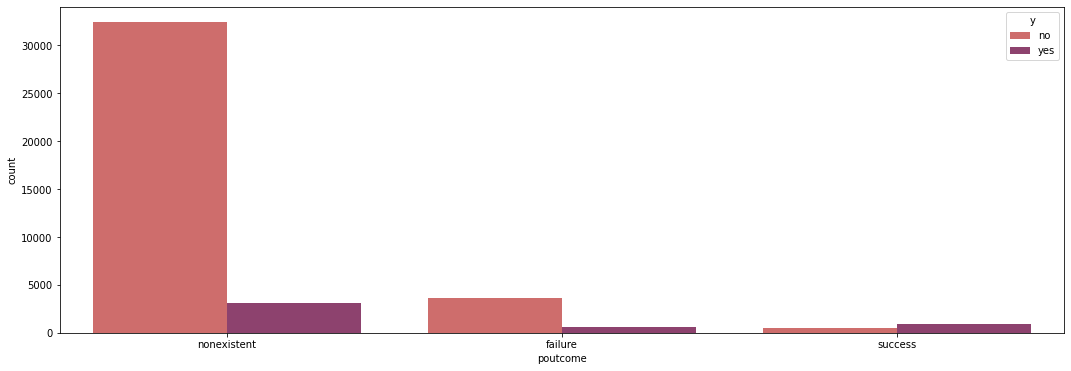

In [10]:
for c in categories:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c,  palette="flare", hue='y',data = data,order = data[c].value_counts().index) #individual bars sorted acc to frequency and then plotted

#Here we can see correlation between categories and deposit situation.


In [11]:
data_for_model= data.copy()
data_for_model.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Let's change deposit status to binary values:


*   1 for yes
*   0 for no


In [12]:
data_2= data.copy()
data_for_model.replace({"no":0, "yes":1}, inplace=True)

Now, to dive into the data deeper, let's see what **categories take deposits the most!**

By jobs...

In [13]:
overall = data_for_model.groupby('job').y.sum().values

deposit_correlation = (round(data_for_model.groupby('job').y.sum()/data_for_model.groupby('job').y.count(),3)*100).values

# Total amount of clients per occupation
people = data_for_model.groupby('job').y.count().values

#Form a dataframe and print
jobs = sorted(data_for_model.job.unique()) #list of all jobs
jobs_with_subscribers = pd.DataFrame({'Job': jobs, 'Deposit takers':overall,'Overall people': people,'Proportion': deposit_correlation})
jobs_with_subscribers.sort_values(by='Proportion', ascending=False)

,Job,Deposit takers,Overall people,Proportion
8,student,275,875,31.4
5,retired,434,1720,25.2
10,unemployed,144,1014,14.2
0,admin.,1352,10422,13.0
4,management,328,2924,11.2
11,unknown,37,330,11.2
9,technician,730,6743,10.8
6,self-employed,149,1421,10.5
3,housemaid,106,1060,10.0
2,entrepreneur,124,1456,8.5


By marital status....

In [14]:

overall = data_for_model.groupby('marital').y.sum().values

deposit_correlation = (round(data_for_model.groupby('marital').y.sum()/data_for_model.groupby('marital').y.count(),3)*100).values

people = data_for_model.groupby('marital').y.count().values

#Form a dataframe and print
marital = sorted(data_for_model.marital.unique()) #list of all jobs
marital_subscribed = pd.DataFrame({'Martial': marital, 'Deposit takers':overall,'Overall people': people,'Proportion': deposit_correlation})
marital_subscribed.sort_values(by='Proportion', ascending=False)

,Martial,Deposit takers,Overall people,Proportion
3,unknown,12,80,15.0
2,single,1620,11568,14.0
0,divorced,476,4612,10.3
1,married,2532,24928,10.2


By age...

In [15]:

overall = data_for_model.groupby('age').y.sum().values

deposit_correlation = (round(data_for_model.groupby('age').y.sum()/data_for_model.groupby('age').y.count(),3)*100).values
people = data_for_model.groupby('age').y.count().values

#Form a dataframe and print
age = sorted(data_for_model.age.unique()) #list of all jobs
age_subscribed = pd.DataFrame({'Age': age, 'Deposit takers':overall,'Overall people': people,'Proportion': deposit_correlation})
age_subscribed.sort_values(by='Proportion', ascending=False)

,Age,Deposit takers,Overall people,Proportion
77,98,2,2,100.0
72,89,2,2,100.0
70,87,1,1,100.0
74,92,3,4,75.0
60,77,13,20,65.0
...,...,...,...,...
32,49,55,839,6.6
30,47,58,928,6.2
73,91,0,2,0.0
75,94,0,1,0.0


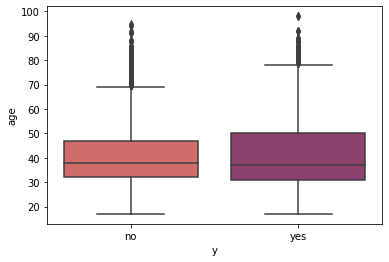

In [16]:
#Hmmm...... Not really informative, let's create a visual representation for age.

sns.boxplot(data=data,x='y',y='age', palette="flare") 

Okay, let's take a look to another correlation representation - **heat map**

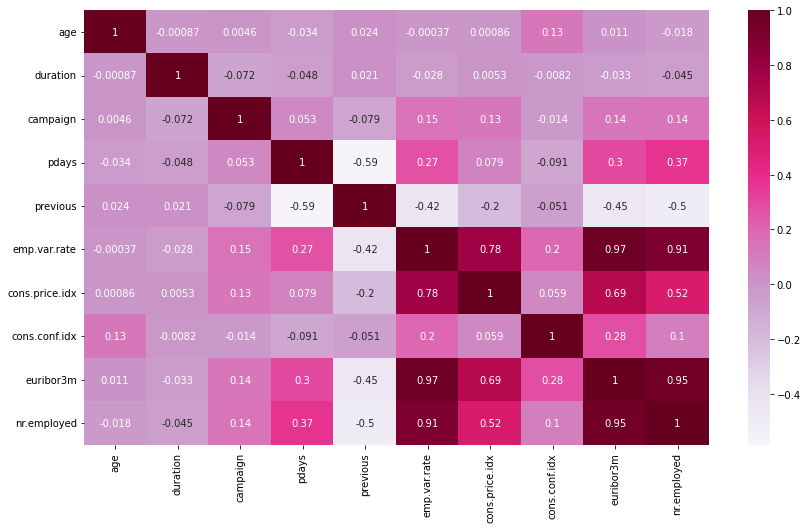

In [17]:
cmap = sns.diverging_palette(120, 20, as_cmap=True)

plt.figure(figsize=(14, 8))
_ = sns.heatmap(data[numericals].corr(), cmap="PuRd", annot=True)

Conclusion: overall, we can see that from all clients old people are more responsive to a deposit marketing....

Also we note that emp.var.rate, cons.price.idx, euribor3m and nr.employed are features with very high correlation to deposit status!

Let's get to feature engineering and model.

In [18]:

#Duration, campaign != deposit (as it stated in project description), so let's drop it
#Month adn day_of_week, contact have nothing to do with deposits in this situation, so drop them too

data_2= data.drop(['duration','campaign','month','day_of_week','contact'],axis=1)
data_2
#data_2['y'] = data['y'].replace(['no','yes'],[0,1])


,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
#We do not need rows with "unknown" it will not help the model to predict!
#So - let's drop it. 

to_drop= data_2[(data_2.job == 'unknown') | (data_2.marital == 'unknown') | (data_2.education == 'unknown') | (data_2.default == 'unknown') | (data_2.housing == 'unknown') | (data_2.loan == 'unknown')].index
data_2.drop(to_drop, inplace = True) 
data_2.shape



(30488, 16)

In [20]:
#Dupes of same data are not useful for us, so let's take care of it and delete duplicates.

data_2 = data_2.drop_duplicates()
data_2.shape


(25777, 16)

In [21]:
#Omg, that's a lot of duplicates!

#Next - one hot encoding, because we have categorical data


categorical_feature_mask = data_2.dtypes==object
categorical_cols = data_2.columns[categorical_feature_mask].tolist()

In [22]:
categorical_cols
data_2.replace({"no":0, "yes":1}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
data_2

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0,0,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0,1,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0,0,0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [24]:
data_hot = data_2[['y']].copy(deep=True)

for col in list(data_2.columns):
    if col not in ['y']:
        dummy_vars = pd.get_dummies(data_2[col])
        dummy_vars.columns = [col+ '_' + str(x) for x in dummy_vars.columns]        
        data_hot = pd.concat([data_hot, dummy_vars], axis=1)

Let's view one hot encoded data!

In [25]:
data_hot

,y,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,age_28,age_29,age_30,age_31,age_32,age_33,age_34,age_35,age_36,age_37,age_38,age_39,age_40,age_41,age_42,age_43,age_44,age_45,age_46,age_47,age_48,age_49,age_50,age_51,age_52,age_53,age_54,age_55,...,euribor3m_4.857,euribor3m_4.8580000000000005,euribor3m_4.859,euribor3m_4.86,euribor3m_4.864,euribor3m_4.865,euribor3m_4.8660000000000005,euribor3m_4.912,euribor3m_4.918,euribor3m_4.921,euribor3m_4.936,euribor3m_4.947,euribor3m_4.955,euribor3m_4.956,euribor3m_4.957,euribor3m_4.958,euribor3m_4.959,euribor3m_4.96,euribor3m_4.961,euribor3m_4.962,euribor3m_4.963,euribor3m_4.9639999999999995,euribor3m_4.965,euribor3m_4.966,euribor3m_4.967,euribor3m_4.968,euribor3m_4.97,euribor3m_5.0,euribor3m_5.045,nr.employed_4963.6,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
41184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
41186,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
data_hot.columns

Index(['y', 'age_17', 'age_18', 'age_19', 'age_20', 'age_21', 'age_22',
       'age_23', 'age_24', 'age_25',
       ...
       'nr.employed_4991.6', 'nr.employed_5008.7', 'nr.employed_5017.5',
       'nr.employed_5023.5', 'nr.employed_5076.2', 'nr.employed_5099.1',
       'nr.employed_5176.3', 'nr.employed_5191.0', 'nr.employed_5195.8',
       'nr.employed_5228.1'],
      dtype='object', length=528)

#Network creation

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [28]:

target = 'y'
features = [x for x in list(data_hot.columns) if x != target]
features 

['age_17',
 'age_18',
 'age_19',
 'age_20',
 'age_21',
 'age_22',
 'age_23',
 'age_24',
 'age_25',
 'age_26',
 'age_27',
 'age_28',
 'age_29',
 'age_30',
 'age_31',
 'age_32',
 'age_33',
 'age_34',
 'age_35',
 'age_36',
 'age_37',
 'age_38',
 'age_39',
 'age_40',
 'age_41',
 'age_42',
 'age_43',
 'age_44',
 'age_45',
 'age_46',
 'age_47',
 'age_48',
 'age_49',
 'age_50',
 'age_51',
 'age_52',
 'age_53',
 'age_54',
 'age_55',
 'age_56',
 'age_57',
 'age_58',
 'age_59',
 'age_60',
 'age_61',
 'age_62',
 'age_63',
 'age_64',
 'age_65',
 'age_66',
 'age_67',
 'age_68',
 'age_69',
 'age_70',
 'age_71',
 'age_72',
 'age_73',
 'age_74',
 'age_75',
 'age_76',
 'age_77',
 'age_78',
 'age_79',
 'age_80',
 'age_81',
 'age_82',
 'age_83',
 'age_84',
 'age_85',
 'age_86',
 'age_87',
 'age_88',
 'age_89',
 'age_91',
 'age_94',
 'age_95',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',


Now, let's create the model and compile it.

In [29]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
from sklearn.model_selection import train_test_split

Splitting on test and train set, after that - let train the model!

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_hot[features], data_hot[target], test_size=0.2, random_state=23)

In [33]:
%%time
history = model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
207/207 [==============================] - 2s 5ms/step - loss: 0.4075 - accuracy: 0.8388
Epoch 2/50
207/207 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.8717
Epoch 3/50
207/207 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8742
Epoch 4/50
207/207 [==============================] - 1s 4ms/step - loss: 0.3230 - accuracy: 0.8755
Epoch 5/50
207/207 [==============================] - 1s 5ms/step - loss: 0.3203 - accuracy: 0.8771
Epoch 6/50
207/207 [==============================] - 1s 5ms/step - loss: 0.3182 - accuracy: 0.8784
Epoch 7/50
207/207 [==============================] - 1s 4ms/step - loss: 0.3160 - accuracy: 0.8787
Epoch 8/50
207/207 [==============================] - 1s 4ms/step - loss: 0.3141 - accuracy: 0.8808
Epoch 9/50
207/207 [==============================] - 1s 4ms/step - loss: 0.3122 - accuracy: 0.8826
Epoch 10/50
207/207 [==============================] - 1s 4ms/step - loss: 0.3102 - accuracy: 0.8831

Now, let's check how good our model via evaluation!

In [34]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

In [35]:
train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

In [36]:
print('Accuracy for test set: %0.4f' % accuracy_score(y_test, test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(y_train, train_set_preds))

print('\n')

print('Precision for test set: %0.4f' % precision_score(y_test, test_set_preds))
print('Precision for train set: %0.4f' % precision_score(y_train, train_set_preds))

print('\n')

print('Recall for test set: %0.4f' % recall_score(y_test, test_set_preds))
print('Recall for train set: %0.4f' % recall_score(y_train, train_set_preds))

Accuracy for test set: 0.8569
Accuracy for train set: 0.9196


Precision for test set: 0.5381
Precision for train set: 0.9394


Recall for test set: 0.2760
Recall for train set: 0.4766


**Accuracy for test set is ~0.85**, and difference between train set accuracy and test set accuracy not that big, meaning the model wasnt overfitted!

Good!

In [37]:
train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

In [38]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)

Now, let's see the AUC. Higher the AUC value, higher the performance of the model

In [39]:
train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for test set: %0.4f' % test_roc_auc)
print('AUC for train set: %0.4f' % train_roc_auc)

AUC for test set: 0.7219
AUC for train set: 0.8864


Okay, that's not that bad. Let's see the plot of curve. 

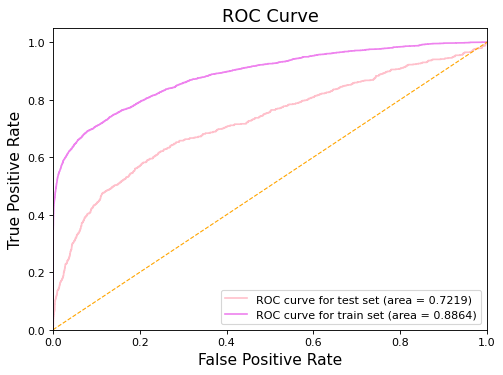

In [40]:
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='pink',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='violet',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [41]:
#visualiztion of network
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                8448      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,593
Trainable params: 8,593
Non-trainable params: 0
_________________________________________________________________
None


#Network Visualization

In [43]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model

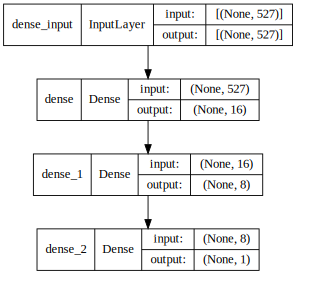

In [46]:
# Visualize network architecture
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog="dot", format="svg"))